# MULTI ARM BANDITS

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class epsilon_bandit:

    def __init__(self, eps, opt_init, init_means, sigmas_a, arms=10, alpha=None, iters=10000, stationary=True):
        # Model variables initialization.
        self.arms = arms
        self.eps = eps
        self.alpha = alpha
        self.Q_a = np.full(arms, opt_init)
        self.qs_a = init_means
        self.sigmas_a = sigmas_a
        self.iters = iters
        self.stationary = stationary
        self.N_a = np.zeros(arms)        
        # Simulation data initialization.
        self.avg_rewards = np.zeros(iters + 1)
        self.Qs = np.zeros((iters + 1, arms))
        self.Qs[0, :] = self.Q_a
        self.qs = np.zeros((iters + 1, arms))
    
    def choose_action(self):
        choice = np.random.choice([0, 1], p=[1-self.eps, self.eps])
        if choice == 0:
            # Greedy choice.
            return np.argmax(self.Q_a)
        else:
            # Explorative choice.
            return np.random.choice(list(range(0, self.arms)))
        
    def pull_arm(self, arm):
        return np.random.normal(self.qs_a[arm], self.sigmas_a[arm])
        
    def update(self, arm, reward, iteration):
        if self.eps >= 0.000001:
            self.eps -= 0.000001
        # Update choice count.
        self.N_a[arm] += 1
        # Update reward estimate and eventually real reward means.
        if self.stationary == True:
            self.Q_a[arm] += (1 / self.N_a[arm]) * (reward - self.Q_a[arm])
        else:
            self.Q_a[arm] += self.alpha * (reward - self.Q_a[arm])
            for i in range(self.arms):
                self.qs_a[i] += np.random.normal()
        # Update simulation data.
        self.avg_rewards[iteration + 1] = self.avg_rewards[iteration] + ((1/(iteration + 1)) * (reward - self.avg_rewards[iteration])) 
        self.Qs[iteration + 1, :] = self.Qs[iteration, :]
        self.Qs[iteration + 1, arm] = self.Q_a[arm]
        self.qs[iteration + 1, :] = self.qs_a

    def get_sim_data(self):
        return (self.iters + 1, np.copy(self.avg_rewards), np.copy(self.N_a), np.copy(self.qs), np.copy(self.Qs))
        
    def run(self):
        for i in range(self.iters):
            arm = self.choose_action()
            reward = self.pull_arm(arm)
            self.update(arm, reward, i)

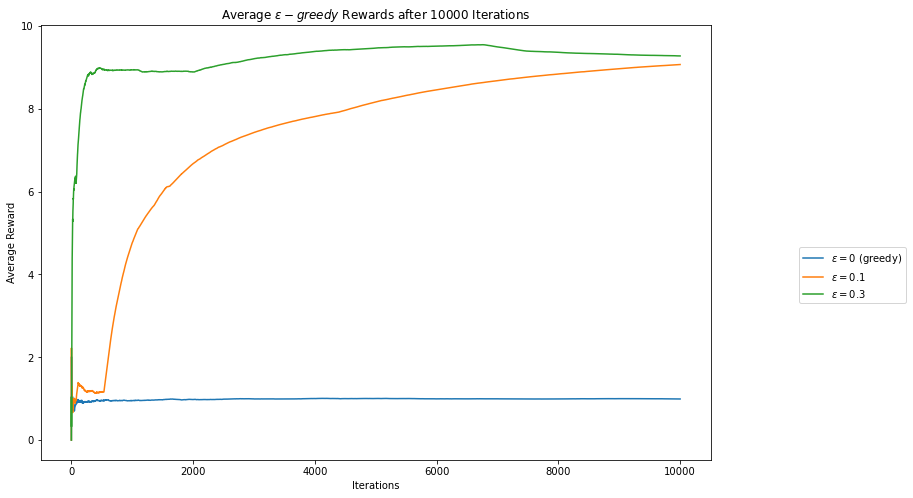

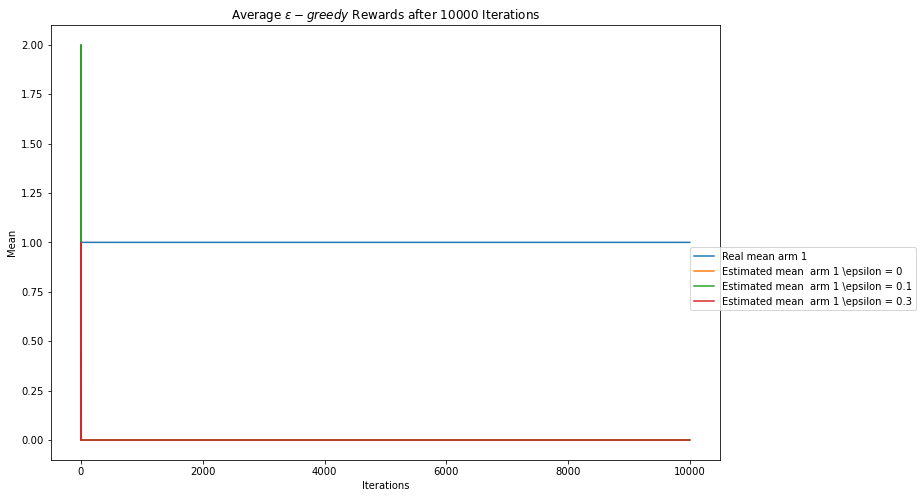

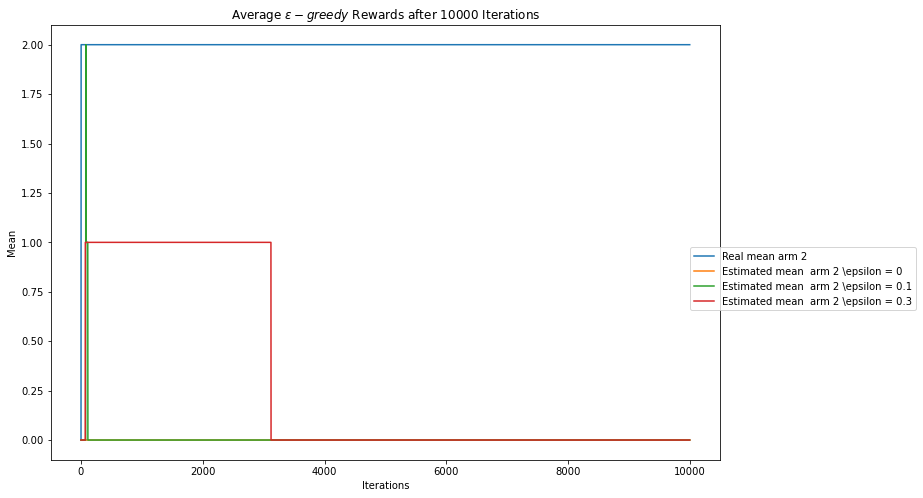

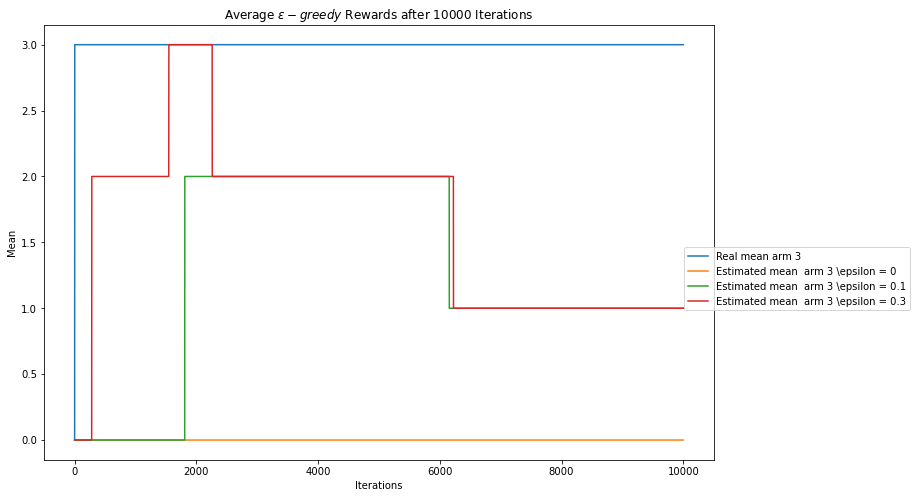

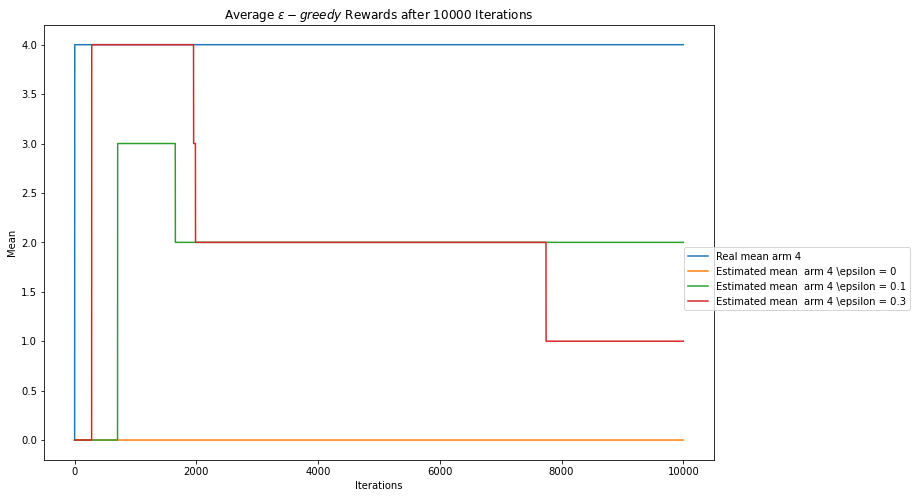

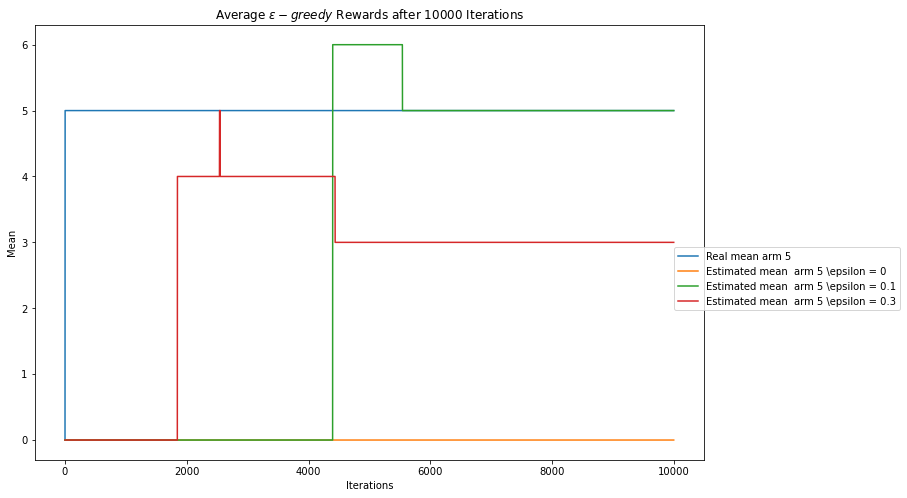

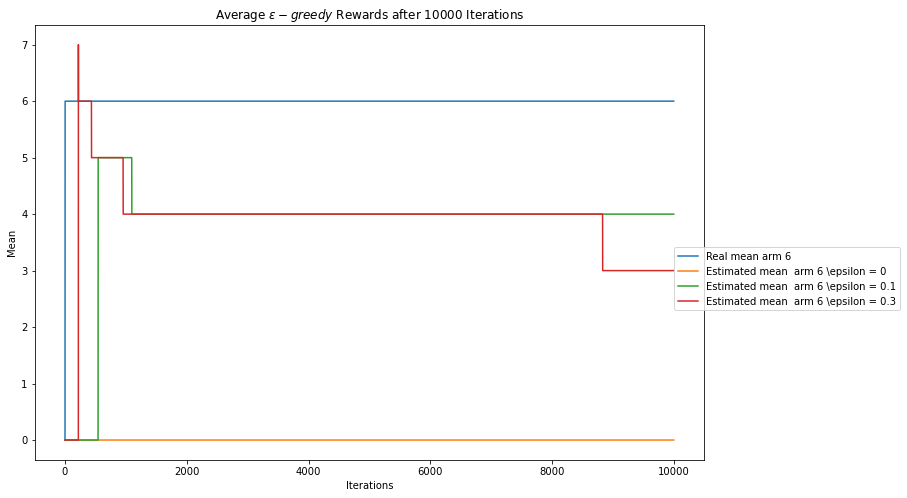

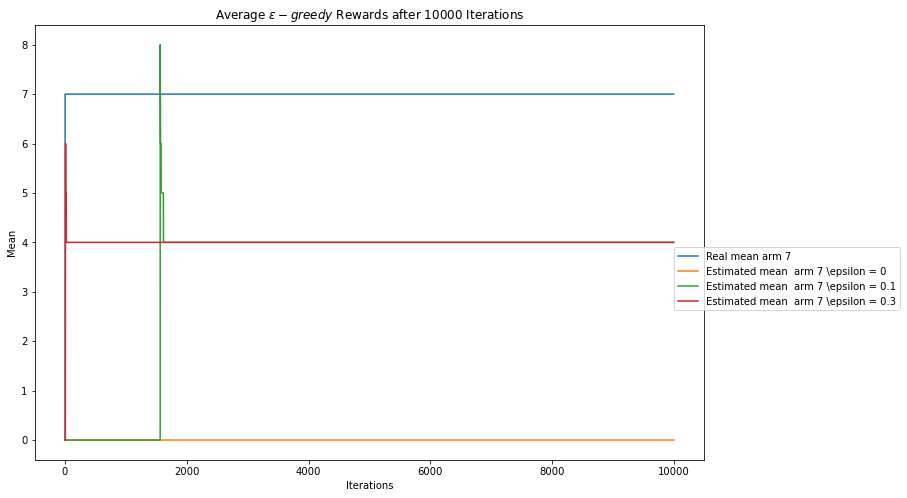

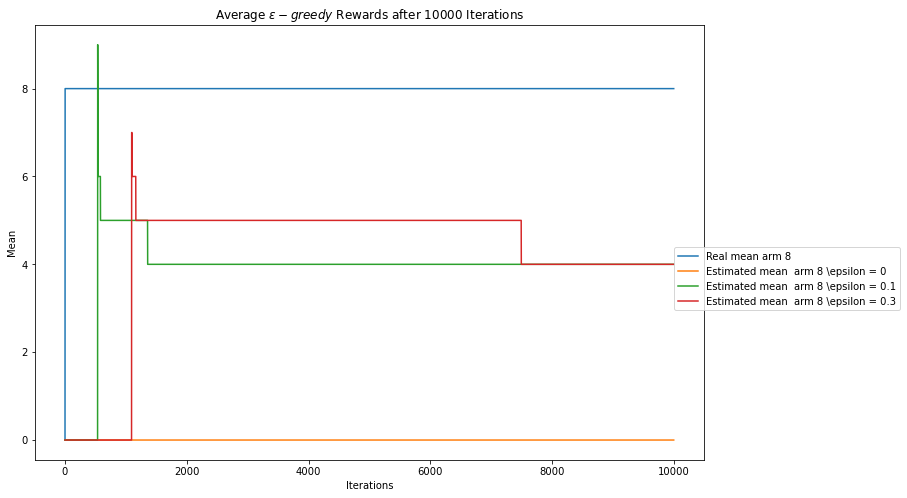

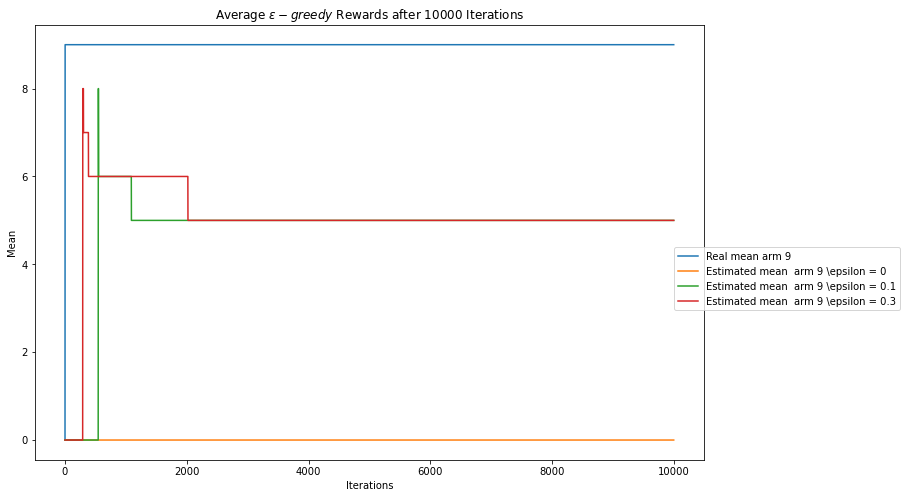

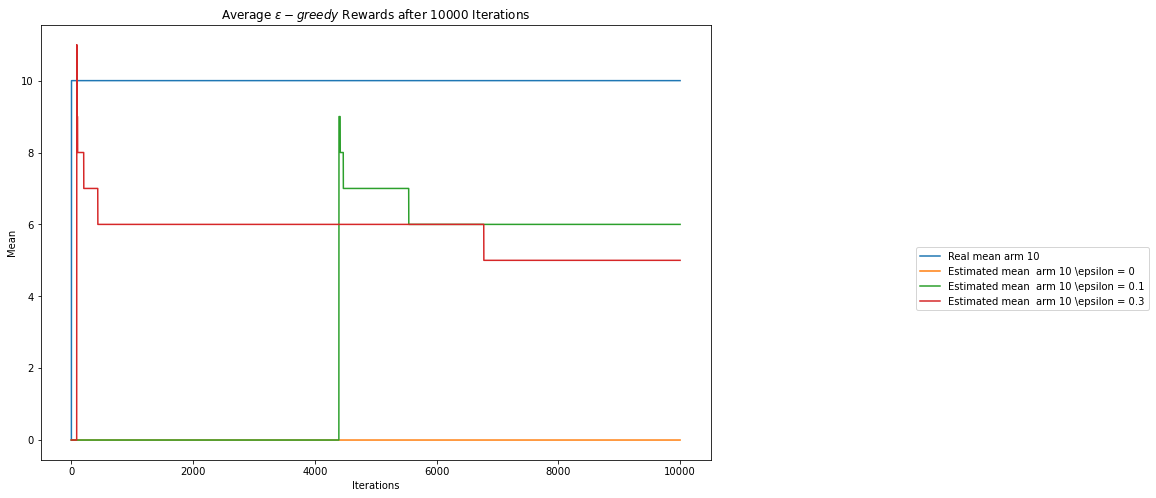

In [3]:
opt_init = 0
arms = 10
#init_means = np.random.uniform(-10, 10, arms)
init_means = list(range(1, arms+1))
#sigmas = np.random.uniform(0.5, 1.5, arms)
sigmas = np.full(arms, 1)

bandit_0 = epsilon_bandit(0, opt_init, init_means, sigmas)
bandit_01 = epsilon_bandit(0.01, opt_init, init_means, sigmas)
bandit_03 = epsilon_bandit(0.03, opt_init, init_means, sigmas)

bandit_0.run()
bandit_01.run()
bandit_03.run()

iters_0, rew_0, N_0, qs_0, Qs_0 = bandit_0.get_sim_data()
iters_01, rew_01, N_01, qs_01, Qs_01 = bandit_01.get_sim_data()
iters_03, rew_03, N_03, qs_03, Qs_03 = bandit_03.get_sim_data()

plt.figure(figsize=(12, 8))
plt.plot(rew_0, label="$\epsilon=0$ (greedy)")
plt.plot(rew_01, label="$\epsilon=0.1$")
plt.plot(rew_03, label="$\epsilon=0.3$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(iters_0-1)
    + " Iterations")
plt.show()

for i in range(arms):
    plt.figure(figsize=(12, 8))
    plt.plot(qs_0[:, i], label="Real mean arm " + str(i+1))
    plt.plot(Qs_0[:, i], label="Estimated mean  arm " + str(i+1) + " \epsilon = 0")
    plt.plot(Qs_01[:, i], label="Estimated mean  arm " + str(i+1) + " \epsilon = 0.1")
    plt.plot(Qs_03[:, i], label="Estimated mean  arm " + str(i+1) + " \epsilon = 0.3")
    plt.legend(bbox_to_anchor=(1.3, 0.5))
    plt.xlabel("Iterations")
    plt.ylabel("Mean")
    plt.title("Average $\epsilon-greedy$ Rewards after " + str(iters_0-1)
        + " Iterations")
    plt.show()

In [7]:
list(range(1, arms+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]